In [114]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

import wordcloud
from wordcloud import WordCloud
import json
import folium
%matplotlib inline
# 한글 설정
# pip install koreanize_matplotlib
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
root = 'C:/workspace/python/project/data/'

# 구글드라이브 : https://drive.google.com/drive/folders/1zIzm1o8-3uxcWSU2DoWpB8aV0Oxdfz_P?usp=sharing

In [2]:
'''
서울시 집값 데이터 프레임
'''
seoul_2021_df = pd.read_csv(root + '부동산_Data/부동산_2021.csv', encoding = 'cp949')
seoul_2022_df = pd.read_csv(root + '부동산_Data/부동산_2022.csv', encoding = 'cp949')
seoul_2023_df = pd.read_csv(root + '부동산_Data/부동산_2023.csv', encoding = 'cp949')

In [3]:
# 서울시 집값 데이터 확인
display(seoul_2021_df.info())
print()
print('+=' * 20)
print()
display(seoul_2022_df.info())
print()
print('+=' * 20)
print()
display(seoul_2023_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138696 entries, 0 to 138695
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   접수연도              138696 non-null  int64  
 1   자치구코드             138696 non-null  int64  
 2   자치구명              138696 non-null  object 
 3   법정동코드             138696 non-null  int64  
 4   법정동명              138696 non-null  object 
 5   지번구분              128407 non-null  float64
 6   지번구분명             128407 non-null  object 
 7   본번                128412 non-null  object 
 8   부번                128412 non-null  float64
 9   건물명               128406 non-null  object 
 10  계약일               138696 non-null  int64  
 11  물건금액(만원)          138696 non-null  int64  
 12  건물면적(㎡)           138696 non-null  float64
 13  토지면적(㎡)           137997 non-null  float64
 14  층                 128423 non-null  float64
 15  권리구분              330 non-null     object 
 16  취소일               62

None


+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66327 entries, 0 to 66326
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   접수연도              66327 non-null  int64  
 1   자치구코드             66327 non-null  int64  
 2   자치구명              66327 non-null  object 
 3   법정동코드             66327 non-null  int64  
 4   법정동명              66327 non-null  object 
 5   지번구분              61424 non-null  float64
 6   지번구분명             61424 non-null  object 
 7   본번                61427 non-null  float64
 8   부번                61427 non-null  float64
 9   건물명               61403 non-null  object 
 10  계약일               66327 non-null  int64  
 11  물건금액(만원)          66327 non-null  int64  
 12  건물면적(㎡)           66327 non-null  float64
 13  토지면적(㎡)           66323 non-null  float64
 14  층                 61435 non-null  float64
 15  권리구분              88 non-null     object 
 1

None


+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69785 entries, 0 to 69784
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   접수연도              69785 non-null  int64  
 1   자치구코드             69785 non-null  int64  
 2   자치구명              69785 non-null  object 
 3   법정동코드             69785 non-null  int64  
 4   법정동명              69785 non-null  object 
 5   지번구분              67020 non-null  float64
 6   지번구분명             67020 non-null  object 
 7   본번                67020 non-null  float64
 8   부번                67020 non-null  float64
 9   건물명               67024 non-null  object 
 10  계약일               69785 non-null  int64  
 11  물건금액(만원)          69785 non-null  int64  
 12  건물면적(㎡)           69785 non-null  float64
 13  토지면적(㎡)           69715 non-null  float64
 14  층                 67033 non-null  float64
 15  권리구분              602 non-null    object 
 1

None

In [4]:
# dict_keys(['2019년 12월 31일 기준', '2020년 12월 31일 기준', '2021년 12월 31일 기준', '2022년 12월 31일 기준', '2023년 12월 4일 기준'])
all_bus_stop_dict = pd.read_excel(root + '교통_Data/버스_정류소현황(2019~2023년).xlsx', sheet_name=None)
bus_stop_address_df = pd.read_excel(root + '교통_Data/서울시버스정류소위치정보(20241110).xlsx')

In [5]:
'''
버스 정류장 데이터 프레임
'''
bus_stop_2021_df = all_bus_stop_dict['2021년 12월 31일 기준']
bus_stop_2022_df = all_bus_stop_dict['2022년 12월 31일 기준']
bus_stop_2023_df = all_bus_stop_dict['2023년 12월 4일 기준']

In [6]:
# 서울시 버스정류장 정보 확인
display(bus_stop_2021_df.info())
print()
print('+=' * 20)
print()
display(bus_stop_2022_df.info())
print()
print('+=' * 20)
print()
display(bus_stop_2023_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10876 entries, 0 to 10875
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준일     10876 non-null  int64 
 1   행정구명    10876 non-null  object
 2   ARS-ID  10876 non-null  int64 
 3   정류소명    10876 non-null  object
 4   노선수     10876 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 425.0+ KB


None


+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11177 entries, 0 to 11176
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준일     11177 non-null  int64 
 1   행정구명    11177 non-null  object
 2   ARS-ID  11177 non-null  int64 
 3   정류소명    11177 non-null  object
 4   노선수     11177 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 436.7+ KB


None


+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11198 entries, 0 to 11197
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준일     11198 non-null  int64 
 1   행정구명    11198 non-null  object
 2   ARS-ID  11198 non-null  int64 
 3   정류소명    11198 non-null  object
 4   노선수     11198 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 437.6+ KB


None

In [7]:
'''
지하철 데이터 프레임
'''
train_2021_df = pd.read_csv(root + '교통_Data/서울시 지역별 지하철역 정보_2021.csv', encoding = 'cp949')
train_2022_df = pd.read_csv(root + '교통_Data/서울시 지역별 지하철역 정보_2022.csv', encoding = 'cp949')
train_2023_df = pd.read_csv(root + '교통_Data/서울시 지역별 지하철역 정보_2023.csv', encoding = 'cp949')

In [8]:
# 지하철 정보 확인
train_2021_df.info()
print()
print('+=' * 20)
print()
train_2022_df.info()
print()
print('+=' * 20)
print()
train_2023_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   연번       32 non-null     int64 
 1   자치구      32 non-null     object
 2   해당역(호선)  32 non-null     object
 3   역개수      32 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.1+ KB

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      30 non-null     int64 
 1   자치구     30 non-null     object
 2   역명(호선)  30 non-null     object
 3   역수      30 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.1+ KB

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ---

In [9]:
'''
주거실태 데이터 프레임
'''
abode_family_df = pd.read_csv(root + '주거실태_Data/거처의_종류_및_거처__가구__가구원__시군구_20241120174650.csv', encoding = 'cp949')
abode_house_category = pd.read_csv(root + '주거실태_Data/주택의_종류별_주택__읍면동_연도_끝자리_0__5___시군구_그_외_연도__20241120174542.csv', encoding = 'cp949')

In [10]:
# 주거실태 정보 확인
abode_family_df.info()
print()
print('+=' * 20)
print()
abode_house_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역별(시군구)  235 non-null    object
 1   거처의 종류      235 non-null    object
 2   2021        235 non-null    object
 3   2021.1      235 non-null    object
 4   2021.2      235 non-null    object
 5   2021.3      235 non-null    object
 6   2021.4      235 non-null    object
 7   2021.5      235 non-null    object
 8   2021.6      235 non-null    object
 9   2021.7      235 non-null    object
 10  2021.8      235 non-null    object
 11  2021.9      235 non-null    object
 12  2021.10     235 non-null    object
 13  2022        235 non-null    object
 14  2022.1      235 non-null    object
 15  2022.2      235 non-null    object
 16  2022.3      235 non-null    object
 17  2022.4      235 non-null    object
 18  2022.5      235 non-null    object
 19  2022.6      235 non-null    object
 20  2022.7    

In [11]:
'''
공원 데이터 프레임
'''
park_2021_df = pd.read_excel(root + '공원_Data/공원현황_2021.xlsx')
park_2022_df = pd.read_excel(root + '공원_Data/공원현황_2022.xlsx')
park_2023_df = pd.read_excel(root + '공원_Data/공원현황_2023.xlsx')

In [12]:
# 공원 정보 확인
display(park_2021_df.info())
print()
print('+=' * 20)
print()
display(park_2022_df.info())
print()
print('+=' * 20)
print()
display(park_2023_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 47 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자치구별(1)  5 non-null      object
 1   자치구별(2)  31 non-null     object
 2   2021     31 non-null     object
 3   2021.1   31 non-null     object
 4   2021.2   31 non-null     object
 5   2021.3   31 non-null     object
 6   2021.4   31 non-null     object
 7   2021.5   31 non-null     object
 8   2021.6   31 non-null     object
 9   2021.7   31 non-null     object
 10  2021.8   31 non-null     object
 11  2021.9   31 non-null     object
 12  2021.10  31 non-null     object
 13  2021.11  31 non-null     object
 14  2021.12  31 non-null     object
 15  2021.13  31 non-null     object
 16  2021.14  31 non-null     object
 17  2021.15  31 non-null     object
 18  2021.16  31 non-null     object
 19  2021.17  31 non-null     object
 20  2021.18  31 non-null     object
 21  2021.19  31 non-null     object
 22  2021

None


+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 38 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자치구별(1)  5 non-null      object
 1   자치구별(2)  31 non-null     object
 2   2022     31 non-null     object
 3   2022.1   31 non-null     object
 4   2022.2   31 non-null     object
 5   2022.3   31 non-null     object
 6   2022.4   31 non-null     object
 7   2022.5   31 non-null     object
 8   2022.6   31 non-null     object
 9   2022.7   31 non-null     object
 10  2022.8   31 non-null     object
 11  2022.9   31 non-null     object
 12  2022.10  31 non-null     object
 13  2022.11  31 non-null     object
 14  2022.12  31 non-null     object
 15  2022.13  31 non-null     object
 16  2022.14  31 non-null     object
 17  2022.15  31 non-null     object
 18  2022.16  31 non-null     object
 19  2022.17  31 non-null     object
 20  2022.18  31 non-null     object
 21

None


+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 38 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자치구별(1)  5 non-null      object
 1   자치구별(2)  31 non-null     object
 2   2023     31 non-null     object
 3   2023.1   31 non-null     object
 4   2023.2   31 non-null     object
 5   2023.3   31 non-null     object
 6   2023.4   31 non-null     object
 7   2023.5   31 non-null     object
 8   2023.6   31 non-null     object
 9   2023.7   31 non-null     object
 10  2023.8   31 non-null     object
 11  2023.9   31 non-null     object
 12  2023.10  31 non-null     object
 13  2023.11  31 non-null     object
 14  2023.12  31 non-null     object
 15  2023.13  31 non-null     object
 16  2023.14  31 non-null     object
 17  2023.15  31 non-null     object
 18  2023.16  31 non-null     object
 19  2023.17  31 non-null     object
 20  2023.18  31 non-null     object
 21

None

In [13]:
'''
유통업체 데이터 프레임
'''
distributor_2021_df = pd.read_excel(root + '유통업체_Data/유통업체현황_2021.xlsx', header=None)
distributor_2022_df = pd.read_excel(root + '유통업체_Data/유통업체현황_2022.xlsx', header=None)
distributor_2023_df = pd.read_excel(root + '유통업체_Data/유통업체현황_2023.xlsx', header=None)

In [14]:
# 유통업체 정보 확인
display(distributor_2021_df.info())
print()
print('+=' * 20)
print()
display(distributor_2022_df.info())
print()
print('+=' * 20)
print()
display(distributor_2023_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5 non-null      object
 1   1       30 non-null     object
 2   2       30 non-null     object
 3   3       30 non-null     object
 4   4       30 non-null     object
 5   5       30 non-null     object
 6   6       30 non-null     object
 7   7       30 non-null     object
 8   8       30 non-null     object
 9   9       30 non-null     object
 10  10      30 non-null     object
 11  11      30 non-null     object
 12  12      30 non-null     object
 13  13      30 non-null     object
 14  14      30 non-null     object
 15  15      30 non-null     object
 16  16      30 non-null     object
 17  17      30 non-null     object
 18  18      30 non-null     object
 19  19      30 non-null     object
 20  20      30 non-null     object
 21  21      30 non-null     object
 22  22      30 non-null     obje

None


+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5 non-null      object
 1   1       30 non-null     object
 2   2       30 non-null     object
 3   3       30 non-null     object
 4   4       30 non-null     object
 5   5       30 non-null     object
 6   6       30 non-null     object
 7   7       30 non-null     object
 8   8       30 non-null     object
 9   9       30 non-null     object
 10  10      30 non-null     object
 11  11      30 non-null     object
 12  12      30 non-null     object
 13  13      30 non-null     object
 14  14      30 non-null     object
 15  15      30 non-null     object
 16  16      30 non-null     object
 17  17      30 non-null     object
 18  18      30 non-null     object
 19  19      30 non-null     object
 20  20      30 non-null     object
 21  21      30 non-null  

None


+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5 non-null      object
 1   1       30 non-null     object
 2   2       30 non-null     object
 3   3       30 non-null     object
 4   4       30 non-null     object
 5   5       30 non-null     object
 6   6       30 non-null     object
 7   7       30 non-null     object
 8   8       30 non-null     object
 9   9       30 non-null     object
 10  10      30 non-null     object
 11  11      30 non-null     object
 12  12      30 non-null     object
 13  13      30 non-null     object
 14  14      30 non-null     object
 15  15      30 non-null     object
 16  16      30 non-null     object
 17  17      30 non-null     object
 18  18      30 non-null     object
 19  19      30 non-null     object
 20  20      30 non-null     object
 21  21      30 non-null  

None

In [15]:
'''
의료기간 데이터 프레임
'''
medical_2021_df = pd.read_excel(root + '의료기관_Data/의료기관_2021.xlsx')
medical_2022_df = pd.read_excel(root + '의료기관_Data/의료기관_2022.xlsx')
medical_2023_df = pd.read_excel(root + '의료기관_Data/의료기관_2023.xlsx')

In [16]:
# 의료기간 정보 확인
display(medical_2021_df.info())
print()
print('+=' * 20)
print()
display(medical_2022_df.info())
print()
print('+=' * 20)
print()
display(medical_2023_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자치구별(1)  4 non-null      object
 1   자치구별(2)  29 non-null     object
 2   2021     29 non-null     object
 3   2021.1   29 non-null     object
 4   2021.2   29 non-null     object
 5   2021.3   29 non-null     object
 6   2021.4   29 non-null     object
 7   2021.5   29 non-null     object
 8   2021.6   29 non-null     object
 9   2021.7   29 non-null     object
 10  2021.8   29 non-null     object
 11  2021.9   29 non-null     object
 12  2021.10  29 non-null     object
 13  2021.11  29 non-null     object
 14  2021.12  29 non-null     object
 15  2021.13  29 non-null     object
 16  2021.14  29 non-null     object
 17  2021.15  29 non-null     object
 18  2021.16  29 non-null     object
 19  2021.17  29 non-null     object
 20  2021.18  29 non-null     object
 21  2021.19  29 non-null     object
 22  2021

None


+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자치구별(1)  4 non-null      object
 1   자치구별(2)  29 non-null     object
 2   2022     29 non-null     object
 3   2022.1   29 non-null     object
 4   2022.2   29 non-null     object
 5   2022.3   29 non-null     object
 6   2022.4   29 non-null     object
 7   2022.5   29 non-null     object
 8   2022.6   29 non-null     object
 9   2022.7   29 non-null     object
 10  2022.8   29 non-null     object
 11  2022.9   29 non-null     object
 12  2022.10  29 non-null     object
 13  2022.11  29 non-null     object
 14  2022.12  29 non-null     object
 15  2022.13  29 non-null     object
 16  2022.14  29 non-null     object
 17  2022.15  29 non-null     object
 18  2022.16  29 non-null     object
 19  2022.17  29 non-null     object
 20  2022.18  29 non-null     object
 21

None


+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자치구별(1)  4 non-null      object
 1   자치구별(2)  29 non-null     object
 2   2023     29 non-null     object
 3   2023.1   29 non-null     object
 4   2023.2   29 non-null     object
 5   2023.3   29 non-null     object
 6   2023.4   29 non-null     object
 7   2023.5   29 non-null     object
 8   2023.6   29 non-null     object
 9   2023.7   29 non-null     object
 10  2023.8   29 non-null     object
 11  2023.9   29 non-null     object
 12  2023.10  29 non-null     object
 13  2023.11  29 non-null     object
 14  2023.12  29 non-null     object
 15  2023.13  29 non-null     object
 16  2023.14  29 non-null     object
 17  2023.15  29 non-null     object
 18  2023.16  29 non-null     object
 19  2023.17  29 non-null     object
 20  2023.18  29 non-null     object
 21

None

In [17]:
population_df = pd.read_csv(root + '인구수_Data/인구수.csv', encoding = 'cp949')

In [18]:
display(population_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역별(읍면동)  26 non-null     object
 1   2021        26 non-null     object
 2   2021.1      26 non-null     object
 3   2021.2      26 non-null     object
 4   2022        26 non-null     object
 5   2022.1      26 non-null     object
 6   2022.2      26 non-null     object
 7   2023        26 non-null     object
 8   2023.1      26 non-null     object
 9   2023.2      26 non-null     object
dtypes: object(10)
memory usage: 2.2+ KB


None

In [19]:
'''
서울시 집값 전처리 함수 (행정구 별 평균시세)
'''
def precleaning_seoul(df) :
  df = df.groupby(['접수연도', '자치구명'])['물건금액(만원)'].mean().reset_index()
  df = df.rename(columns = {'접수연도' : '연도', '자치구명' : '구', '물건금액(만원)' : '평균시세'})
  df['평균시세'] = round(df['평균시세'], 2)
  return df

In [20]:
# 서울시 집값 전처리 함수 적용
seoul_2021_avg_df = precleaning_seoul(seoul_2021_df)
seoul_2022_avg_df = precleaning_seoul(seoul_2022_df)
seoul_2023_avg_df = precleaning_seoul(seoul_2023_df)

In [21]:
  # 확인
display(seoul_2021_avg_df[:5])
display(seoul_2022_avg_df[:5])
display(seoul_2023_avg_df[:5])

,연도,구,평균시세
0,2021,강남구,138010.04
1,2021,강동구,62549.12
2,2021,강북구,35889.32
3,2021,강서구,40366.03
4,2021,관악구,48427.37


,연도,구,평균시세
0,2022,강남구,123693.29
1,2022,강동구,51011.04
2,2022,강북구,32732.90
3,2022,강서구,31981.76
4,2022,관악구,45166.59


,연도,구,평균시세
0,2023,강남구,183379.26
1,2023,강동구,75582.99
2,2023,강북구,36304.43
3,2023,강서구,42398.42
4,2023,관악구,48166.53


In [22]:
'''
유통업체 전처리 함수
'''
def precleaning_distributor(df) :
  # 컬럼명 지정
  df.columns = df.iloc[1] + '_' + df.iloc[3]
  df.columns = df.columns.str.strip()
  # 쓸모없는 행 삭제
  df = df.iloc[4:].reset_index(drop=True)
  # 쓸모없는 열 삭제
  df = df.drop(columns = ['동별(1)_동별(1)'])
  
  # 컬럼명 보기 쉽게 변경
  df = df.rename(columns = {'동별(2)_동별(2)' : '구'})
  columns = []
  for column in df.columns : 
    column = column.split(' (')
    columns.append(column[0])
  df.columns = columns
  return df

In [23]:
'''
유통업체 전처리 함수 적용
'''
distributor_2021_df = precleaning_distributor(distributor_2021_df)
distributor_2022_df = precleaning_distributor(distributor_2022_df)
distributor_2023_df = precleaning_distributor(distributor_2023_df)

In [24]:
  # 확인
display(distributor_2021_df[:5])
display(distributor_2022_df[:5])
display(distributor_2023_df[:5])

,구,합계_개소,합계_판매면적,합계_건물연면적,대형마트_개소,대형마트_판매면적,대형마트_건물연면적,백화점_개소,백화점_판매면적,백화점_건물연면적,...,전문점_건물연면적,쇼핑센터_개소,쇼핑센터_판매면적,쇼핑센터_건물연면적,복합쇼핑몰_개소,복합쇼핑몰_판매면적,복합쇼핑몰_건물연면적,그밖의 대규모점포_개소,그밖의 대규모점포_판매면적,그밖의 대규모점포_건물연면적
0,소계,455,4703202,24960186,57,625265,5056615,31,1032900,3998397,...,2348164,39,760636,4269229,8,158173,1293014,296,1822892,7994768
1,종로구,13,156702,490721,-,-,-,-,-,-,...,168311,-,-,-,-,-,-,11,140446,322410
2,중구,54,753303,2967459,2,30700,477708,3,129514,257206,...,76932,9,127030,498863,-,-,-,38,447683,1656751
3,용산구,15,268776,674560,2,14185,16643,1,17898,22663,...,231510,3,91776,298328,-,-,-,1,6876,105416
4,성동구,8,67174,436952,2,25949,198358,-,-,-,...,31845,-,-,-,-,-,-,5,14096,206749


,구,합계_개소,합계_판매면적,합계_건물연면적,대형마트_개소,대형마트_판매면적,대형마트_건물연면적,백화점_개소,백화점_판매면적,백화점_건물연면적,...,전문점_건물연면적,쇼핑센터_개소,쇼핑센터_판매면적,쇼핑센터_건물연면적,복합쇼핑몰_개소,복합쇼핑몰_판매면적,복합쇼핑몰_건물연면적,그밖의 대규모점포_개소,그밖의 대규모점포_판매면적,그밖의 대규모점포_건물연면적
0,소계,444,4752549,25471156,55,590997,4904097,31,1032900,3998397,...,2347163,41,889010,4732999,8,120338,1274832,285,1787405,8213669
1,종로구,13,156702,490721,-,-,-,-,-,-,...,168311,-,-,-,-,-,-,11,140446,322410
2,중구,54,755206,2967459,2,30700,477708,3,129514,257206,...,76932,9,127030,498863,-,-,-,38,449586,1656751
3,용산구,15,335577,650896,2,14185,16643,1,17898,22663,...,230509,3,130014,275665,-,-,-,1,6876,105416
4,성동구,8,66659,479598,1,11437,98956,-,-,-,...,31845,-,-,-,1,13997,142038,5,14096,206759


,구,합계_개소,합계_판매면적,합계_건물연면적,대형마트_개소,대형마트_판매면적,대형마트_건물연면적,백화점_개소,백화점_판매면적,백화점_건물연면적,...,전문점_건물연면적,쇼핑센터_개소,쇼핑센터_판매면적,쇼핑센터_건물연면적,복합쇼핑몰_개소,복합쇼핑몰_판매면적,복합쇼핑몰_건물연면적,그밖의 대규모점포_개소,그밖의 대규모점포_판매면적,그밖의 대규모점포_건물연면적
0,소계,427,4714086,25706408,55,590996,5045620,31,1032900,4034667,...,2347597,39,862557,4667269,8,120338,1274832,270,1780834,8336424
1,종로구,13,176580,465399,-,-,-,-,-,-,...,168747,-,-,-,-,-,-,11,165669,296653
2,중구,54,755206,2967459,2,30700,477708,3,129514,257206,...,76932,9,127030,498863,-,-,-,38,449586,1656751
3,용산구,15,335577,650896,2,14185,16643,1,17898,22663,...,230509,3,130014,275665,-,-,-,1,6876,105416
4,성동구,8,66659,479598,1,11437,98956,-,-,-,...,31845,-,-,-,1,13997,142038,5,14096,206759


In [25]:
'''
버스 정류장 전처리 함수
'''
def precleaning_bus(df) :
  # 연도를 보기쉽게 바꾸기 위해 앞 4글자만 추출
  year = df['기준일'].astype(str).str[:4]
  
  # 추출한 값으로 변경
  df['기준일'] = year
  
  # 컬럼명 통일
  df = df.rename(columns = {'기준일' : '연도', '행정구명' : '구'})
  
  # 버스 정보와 위치정보 병합
  df = pd.merge(df, bus_stop_address_df[['ARS_ID', 'X좌표', 'Y좌표']], 
                              left_on='ARS-ID', right_on='ARS_ID', how='left')
  # ARS_ID 중복 컬럼 제거
  df.drop(columns=['ARS_ID'], inplace=True)
  return df

In [26]:
'''
버스 전처리 함수 적용
'''
bus_stop_2021_df = precleaning_bus(bus_stop_2021_df)
bus_stop_2022_df = precleaning_bus(bus_stop_2022_df)
bus_stop_2023_df = precleaning_bus(bus_stop_2023_df)

In [27]:
  # 확인
display(bus_stop_2021_df)
display(bus_stop_2022_df)
display(bus_stop_2023_df)

,연도,구,ARS-ID,정류소명,노선수,X좌표,Y좌표
0,2021,종로구,1001,종로2가사거리,10,126.987752,37.569806
1,2021,종로구,1002,창경궁.서울대학교병원,16,126.996521,37.579433
2,2021,종로구,1003,명륜3가.성대입구,16,126.998251,37.582580
3,2021,종로구,1004,종로2가.삼일교,6,126.987613,37.568579
4,2021,종로구,1005,혜화동로터리.여운형활동터,15,127.001744,37.586243
...,...,...,...,...,...,...,...
10871,2021,강동구,25995,우성아파트,4,127.139339,37.550386
10872,2021,강동구,25996,우성아파트,4,127.140046,37.550643
10873,2021,강동구,25997,조일약국,1,127.123596,37.533630
10874,2021,강동구,25998,성내시장,1,127.125497,37.536155


,연도,구,ARS-ID,정류소명,노선수,X좌표,Y좌표
0,2022,종로구,1001,종로2가사거리,10,126.987752,37.569806
1,2022,종로구,1002,창경궁.서울대학교병원,20,126.996521,37.579433
2,2022,종로구,1003,명륜3가.성대입구,20,126.998251,37.582580
3,2022,종로구,1004,종로2가.삼일교,7,126.987613,37.568579
4,2022,종로구,1005,혜화동로터리.여운형활동터,16,127.001744,37.586243
...,...,...,...,...,...,...,...
11172,2022,강동구,25995,우성아파트,4,127.139339,37.550386
11173,2022,강동구,25996,우성아파트,4,127.140046,37.550643
11174,2022,강동구,25997,조일약국,1,127.123596,37.533630
11175,2022,강동구,25998,성내시장,1,127.125497,37.536155


,연도,구,ARS-ID,정류소명,노선수,X좌표,Y좌표
0,2023,종로구,1001,종로2가사거리,10,126.987752,37.569806
1,2023,종로구,1002,창경궁.서울대학교병원,21,126.996521,37.579433
2,2023,종로구,1003,명륜3가.성대입구,21,126.998251,37.582580
3,2023,종로구,1004,종로2가.삼일교,7,126.987613,37.568579
4,2023,종로구,1005,혜화동로터리.여운형활동터,17,127.001744,37.586243
...,...,...,...,...,...,...,...
11193,2023,강동구,25995,우성아파트,4,127.139339,37.550386
11194,2023,강동구,25996,우성아파트,4,127.140046,37.550643
11195,2023,강동구,25997,조일약국,1,127.123596,37.533630
11196,2023,강동구,25998,성내시장,1,127.125497,37.536155


In [28]:
'''
지하철 전처리 함수
'''
def precleaning_train(df) :
  df.columns = ['구', '해당역(호선)', '역개수']
  filtered_df = df[df['구'].isin(seoul_2021_avg_df['구'])]
  return filtered_df

In [29]:
# 지하철 전처리 함수 적용
train_2021_df.drop(columns = '연번', inplace= True)
train_2022_df.drop(columns = '연번', inplace= True)

train_2021_df = precleaning_train(train_2021_df)
train_2022_df = precleaning_train(train_2022_df)
train_2023_df = precleaning_train(train_2023_df)

In [30]:
  # 확인
display(train_2021_df)
display(train_2022_df)
display(train_2023_df)

,구,해당역(호선),역개수
0,강남구,삼성(2) 선릉(2) 역삼(2) 강남(2) 압구정(3) 신사(3) 매봉(3) 도곡(...,21
1,강동구,천호(5) 강동(5) 길동(5) 굽은다리(5) 명일(5) 고덕(5) 상일동(5) 둔...,14
2,강북구,수유(4) 미아(4) 미아사거리(4),3
3,강서구,방화(5) 개화산(5) 김포공항(5) 송정(5) 마곡(5) 발산(5) 우장산(5) ...,9
4,관악구,낙성대(2) 서울대입구(2) 봉천(2) 신림(2),4
5,광진구,건대입구(2) 구의(2) 강변(2) 군자(5) 아차산(5) 광나루(5) 중곡(7) ...,11
6,구로구,구로디지털단지(2) 대림(2) 신도림(2) 도림천(2) 남구로(7) 천왕(7) 온수(7),7
7,금천구,가산디지털단지(7),1
8,노원구,당고개(4) 상계(4) 노원(4) 석계(6) 태릉입구(6) 화랑대(6) 수락산(7)...,13
9,도봉구,창동(4) 쌍문(4) 도봉산(7),3


,구,해당역(호선),역개수
0,강남구,"삼성(2), 선릉(2), 역삼(2), 강남(2), 압구정(3), 신사(3), 매봉(...",21
1,강동구,"천호(5), 강동(5), 길동(5), 굽은다리(5), 명일(5), 고덕(5), 상일...",14
2,강북구,"수유(4), 미아(4), 미아사거리(4)",3
3,강서구,"방화(5), 개화산(5), 김포공항(5), 송정(5), 마곡(5), 발산(5), 우...",9
4,관악구,"낙성대(2), 서울대입구(2), 봉천(2), 신림(2)",4
5,광진구,"건대입구(2), 구의(2), 강변(2), 군자(5), 아차산(5), 광나루(5), ...",11
6,구로구,"구로디지털단지(2), 대림(2), 신도림(2), 도림천(2), 남구로(7), 천왕(...",7
7,금천구,가산디지털단지(7),1
8,노원구,"당고개(4), 상계(4), 노원(4), 석계(6), 태릉입구(6), 화랑대(6), ...",13
9,도봉구,"창동(4), 쌍문(4), 도봉산(7)",3


,구,해당역(호선),역개수
0,강남구,"삼성(2), 선릉(2), 역삼(2), 강남(2), 압구정(3), 신사(3), 매봉(...",21
1,강동구,"천호(5), 강동(5), 길동(5), 굽은다리(5), 명일(5), 고덕(5), 상일...",14
2,강북구,"수유(4), 미아(4), 미아사거리(4)",3
3,강서구,"방화(5), 개화산(5), 김포공항(5), 송정(5), 마곡(5), 발산(5), 우...",9
4,관악구,"낙성대(2), 서울대입구(2), 봉천(2), 신림(2)",4
5,광진구,"건대입구(2), 구의(2), 강변(2), 군자(5), 아차산(5), 광나루(5), ...",11
6,구로구,"구로디지털단지(2), 대림(2), 신도림(2), 도림천(2), 남구로(7), 천왕(...",7
7,금천구,가산디지털단지(7),1
8,노원구,"당고개(4), 상계(4), 노원(4), 석계(6), 태릉입구(6), 화랑대(6), ...",13
9,도봉구,"창동(4), 쌍문(4), 도봉산(7)",3


In [31]:
'''
인구수 전처리 함수
'''
def precleaning_population(df, choice) :
  year = df.columns.str.contains(choice)
  year[0] = True
  
  tmp_df = df.loc[:, year]
  columns_name = tmp_df.iloc[0].values
  tmp_df.columns = columns_name
  tmp_df = tmp_df.drop(0)
  tmp_df = tmp_df.rename(columns = {'행정구역별(읍면동)' : '구'})
  columns_name = tmp_df.columns[1:]
  
  for idx, column in enumerate(columns_name) :
    tmp_df = tmp_df.rename(columns = {column : column.split(' ')[0]})
  
  return tmp_df

In [32]:
# 인구수 전처리 함수 적용
population_2021_df = precleaning_population(population_df, '2021')
population_2022_df = precleaning_population(population_df, '2022')
population_2023_df = precleaning_population(population_df, '2023')

In [33]:
  # 확인
display(population_2021_df[:5])
display(population_2022_df[:5])
display(population_2023_df[:5])

,구,총인구,내국인-계,외국인-계
1,종로구,148857,137913,10944
2,중구,126310,114942,11368
3,용산구,221688,205288,16400
4,성동구,286469,276273,10196
5,광진구,347099,328395,18704


,구,총인구,내국인-계,외국인-계
1,종로구,147512,135107,12405
2,중구,125257,113309,11948
3,용산구,219289,203463,15826
4,성동구,282131,271540,10591
5,광진구,346519,326453,20066


,구,총인구,내국인-계,외국인-계
1,종로구,146179,133520,12659
2,중구,127576,115926,11650
3,용산구,214791,200568,14223
4,성동구,277683,267315,10368
5,광진구,348160,326550,21610


In [37]:
bus_stop_2021_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10876 entries, 0 to 10875
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      10876 non-null  object 
 1   구       10876 non-null  object 
 2   ARS-ID  10876 non-null  int64  
 3   정류소명    10876 non-null  object 
 4   노선수     10876 non-null  int64  
 5   X좌표     10655 non-null  float64
 6   Y좌표     10655 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 594.9+ KB


In [39]:
bus_stop_2021_df[['X좌표', 'Y좌표']].describe()

,X좌표,Y좌표
count,10655.000000,10655.000000
mean,126.985511,37.550977
std,0.086137,0.055053
min,126.457230,37.430947
25%,126.917055,37.502602
50%,126.993890,37.550456
75%,127.050600,37.591307
max,127.181785,37.690177


In [44]:
bus_stop_2021_df[bus_stop_2021_df['X좌표'] == 126.457230]

,연도,구,ARS-ID,정류소명,노선수,X좌표,Y좌표
3179,2021,강북구,9642,8번지입구,1,126.45723,37.440965


In [48]:
bus_stop_2021_df.loc[3179, 'X좌표'] = 127.037725
bus_stop_2021_df.loc[3179, 'Y좌표'] = 37.613705
display(bus_stop_2021_df.loc[3179])

연도              2021
구                강북구
ARS-ID          9642
정류소명           8번지입구
노선수                1
X좌표       127.037725
Y좌표        37.613705
Name: 3179, dtype: object

<Axes: xlabel='X좌표', ylabel='Y좌표'>

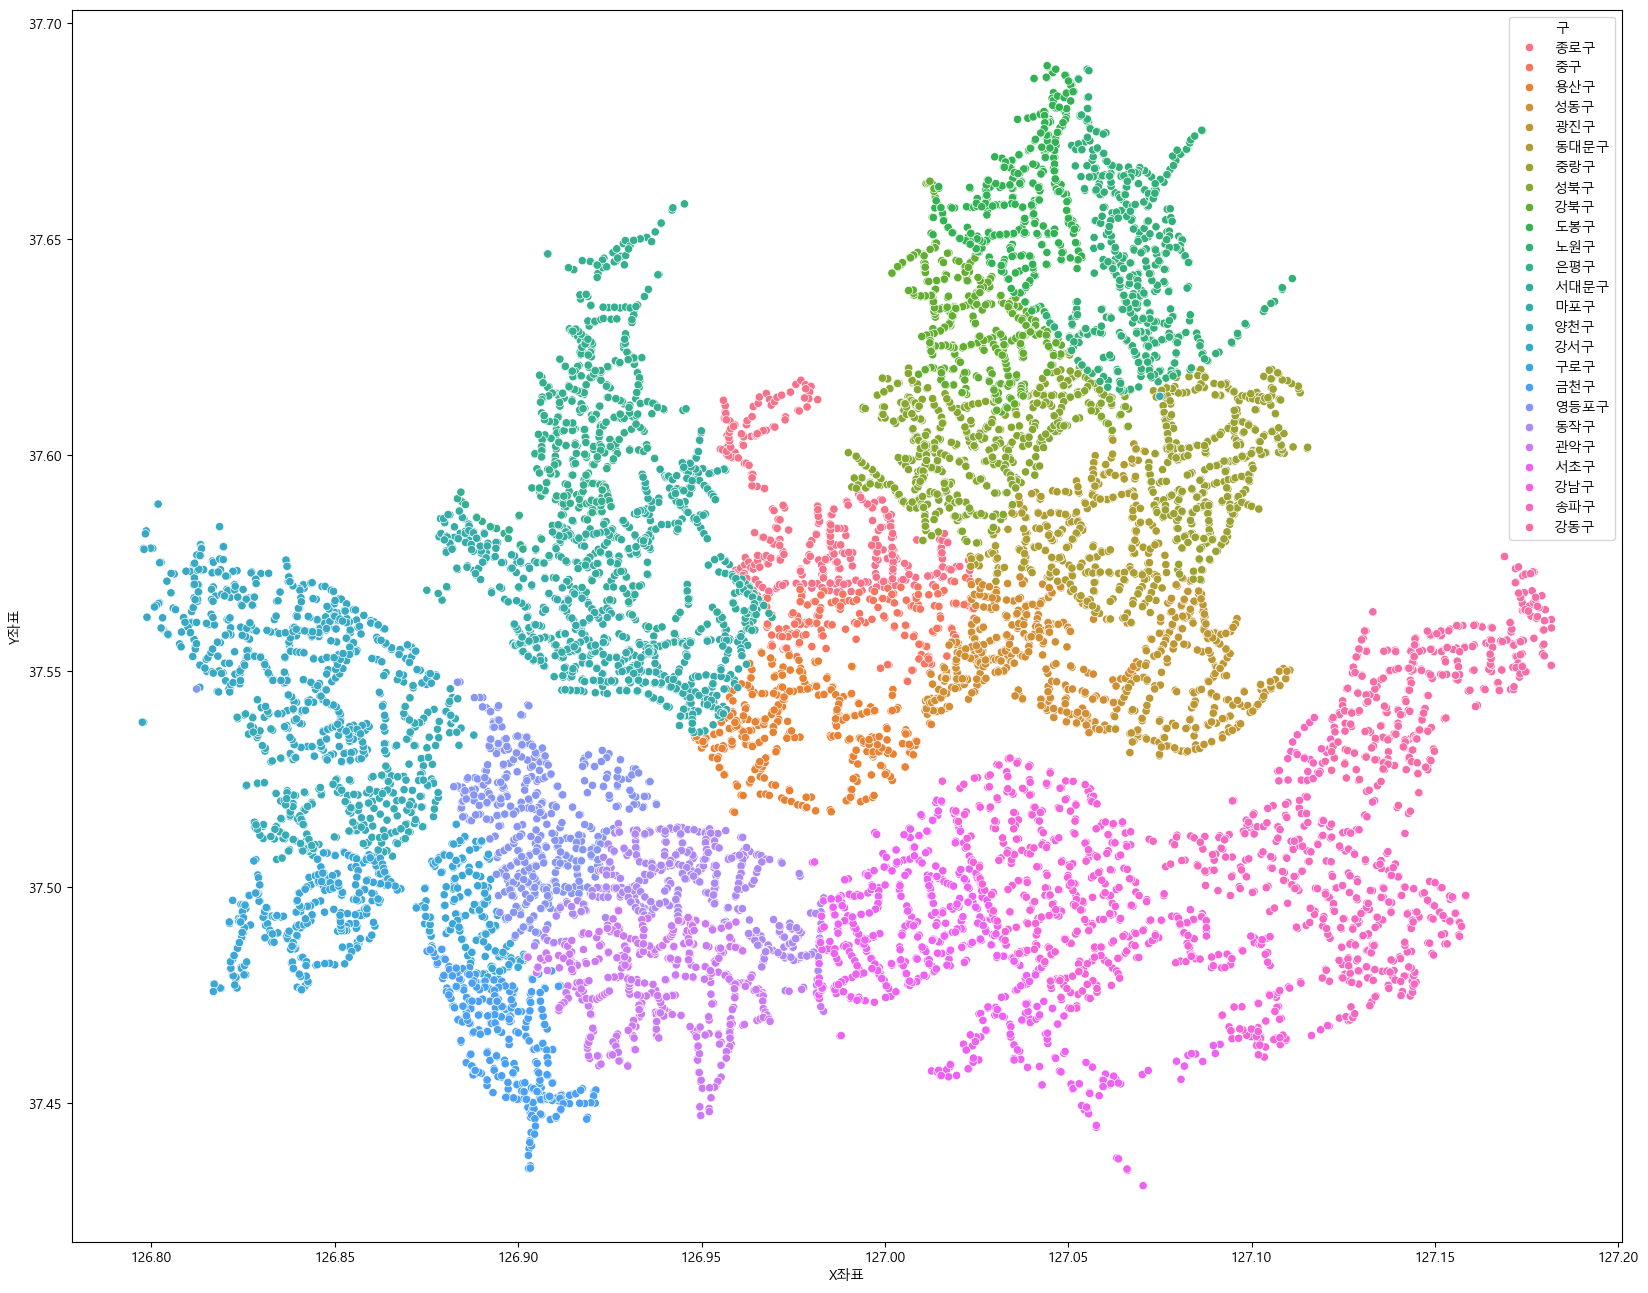

In [50]:
plt.figure(figsize = (20, 16))
sns.scatterplot(bus_stop_2021_df, x = 'X좌표', y = 'Y좌표', hue = '구')

In [54]:
concat_seoul_df = pd.concat([seoul_2021_avg_df, seoul_2022_avg_df, seoul_2023_avg_df])

In [55]:
concat_seoul_df

,연도,구,평균시세
0,2021,강남구,138010.04
1,2021,강동구,62549.12
2,2021,강북구,35889.32
3,2021,강서구,40366.03
4,2021,관악구,48427.37
...,...,...,...
20,2023,용산구,152903.78
21,2023,은평구,49665.98
22,2023,종로구,75491.21
23,2023,중구,74966.33


Text(0.5, 1.0, '서울시 연도별 평균분양가격 (2021 ~ 2023)')

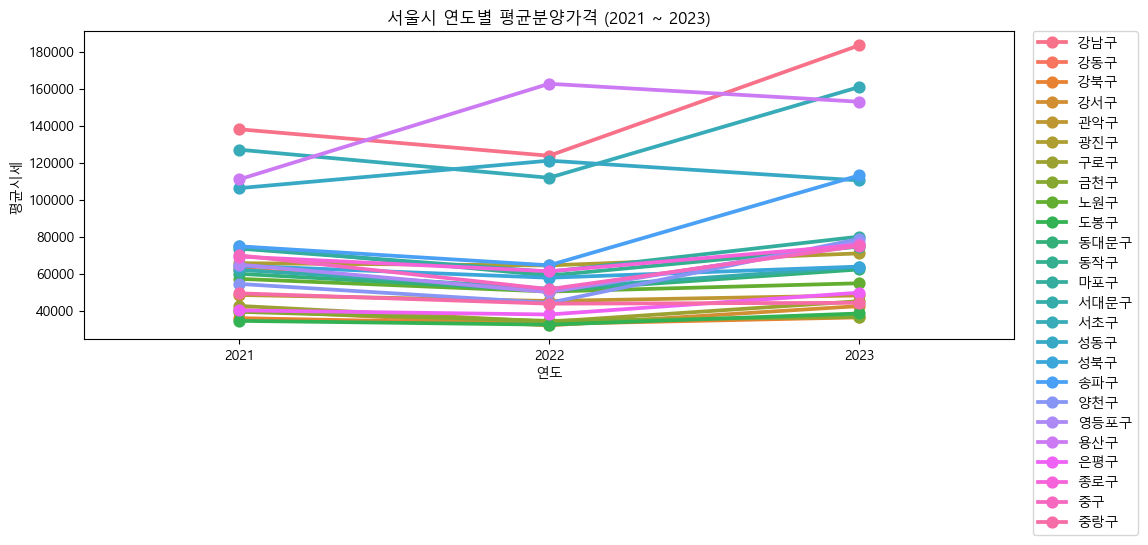

In [57]:
'''
연도별 평당분양가격 : pointplot()
'''
plt.figure(figsize = (12, 4))
sns.pointplot(concat_seoul_df, x = '연도', y = '평균시세', hue = '구')

plt.legend(bbox_to_anchor = (1.02, 1), loc = 2, borderaxespad = 0.)
plt.title('서울시 연도별 평균분양가격 (2021 ~ 2023)')

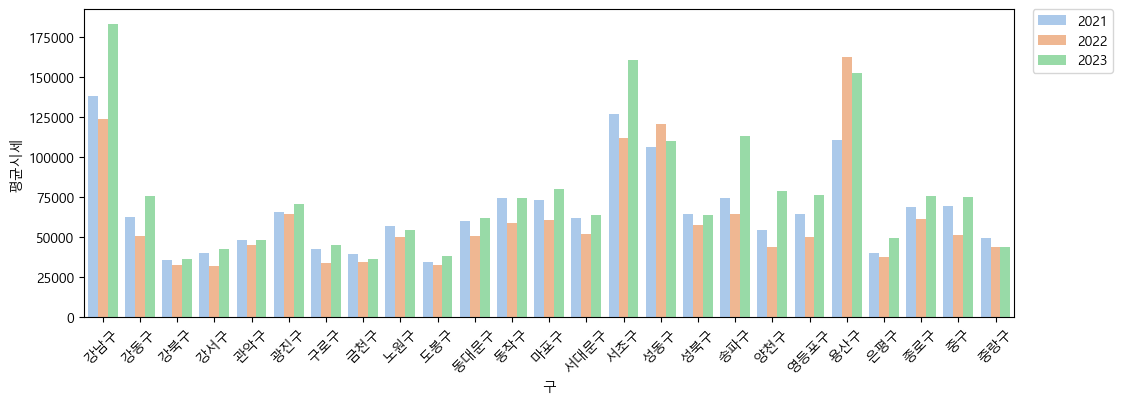

In [64]:
plt.figure(figsize = (12, 4))
sns.barplot(concat_seoul_df, x = '구', y = '평균시세', hue = '연도', palette = 'pastel', ci = None)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor = (1.02, 1), loc = 2, borderaxespad = 0.)

Text(0.5, 1.0, '전국 연도별 평당분양가격 (2015.10 ~ 2024.09)')

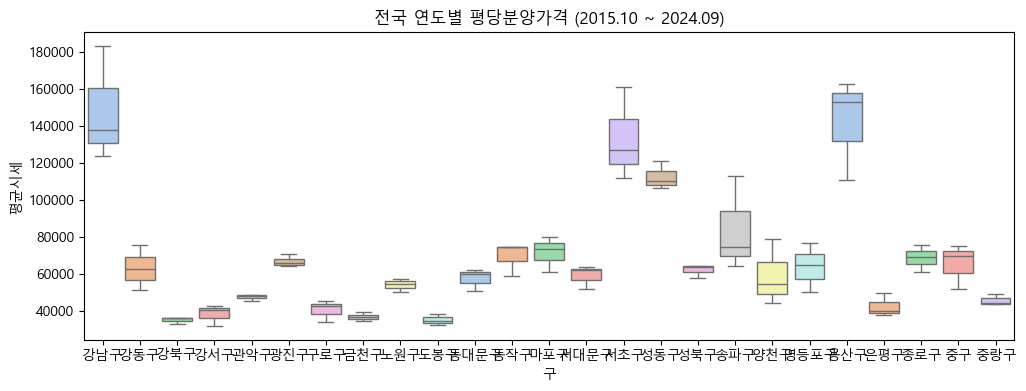

In [66]:
plt.figure(figsize = (12, 4))
sns.boxplot(concat_seoul_df, x = '구', y = '평균시세', palette = 'pastel')

# plt.legend(bbox_to_anchor = (1.02, 1), loc = 2, borderaxespad = 0.)
plt.title('전국 연도별 평당분양가격 (2015.10 ~ 2024.09)')

In [75]:
def wordcloud(data, width=1200, height=500):
  word_c = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                     width=width, height=height,
                     background_color='white', random_state=42)
  word_c.generate(data)
  plt.figure(figsize=(15, 7))
  plt.imshow(word_c)
  plt.axis('off')
  plt.show()  

In [105]:
word2_df = pd.read_excel(root + 'NewsResult_2021.xlsx')
word3_df = pd.read_excel(root + 'NewsResult_2022.xlsx')
word4_df = pd.read_excel(root + 'NewsResult_2023.xlsx')

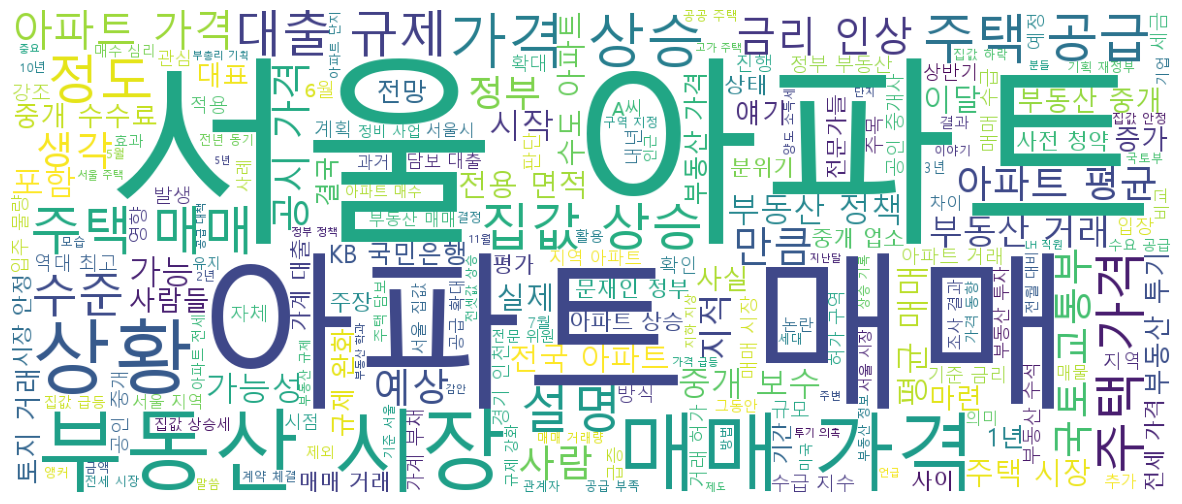

In [106]:
text = " ".join(word2_df['키워드'].values)
wordcloud(text, width=1200, height=500)

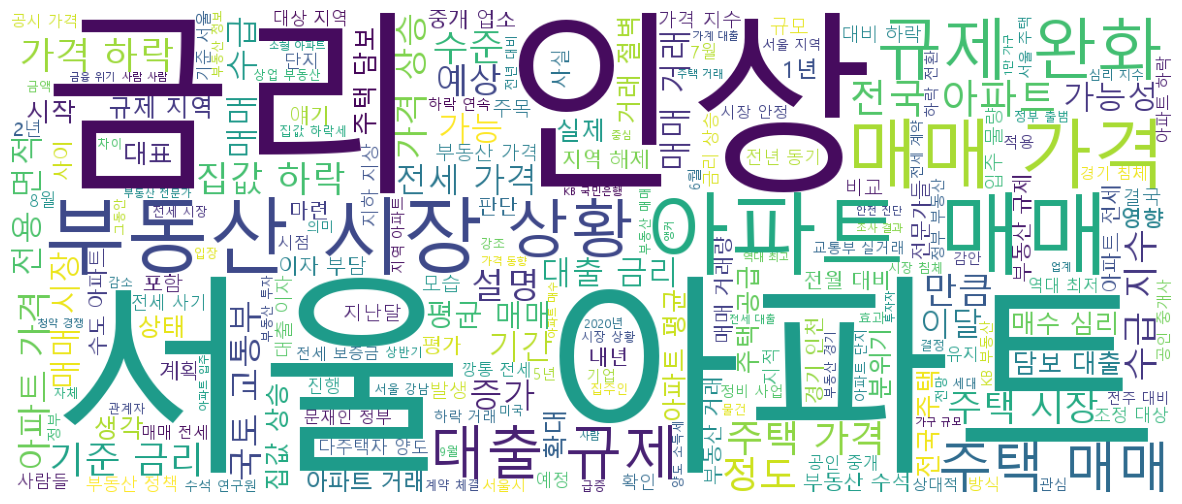

In [107]:
text = " ".join(word3_df['키워드'].values)
wordcloud(text, width=1200, height=500)

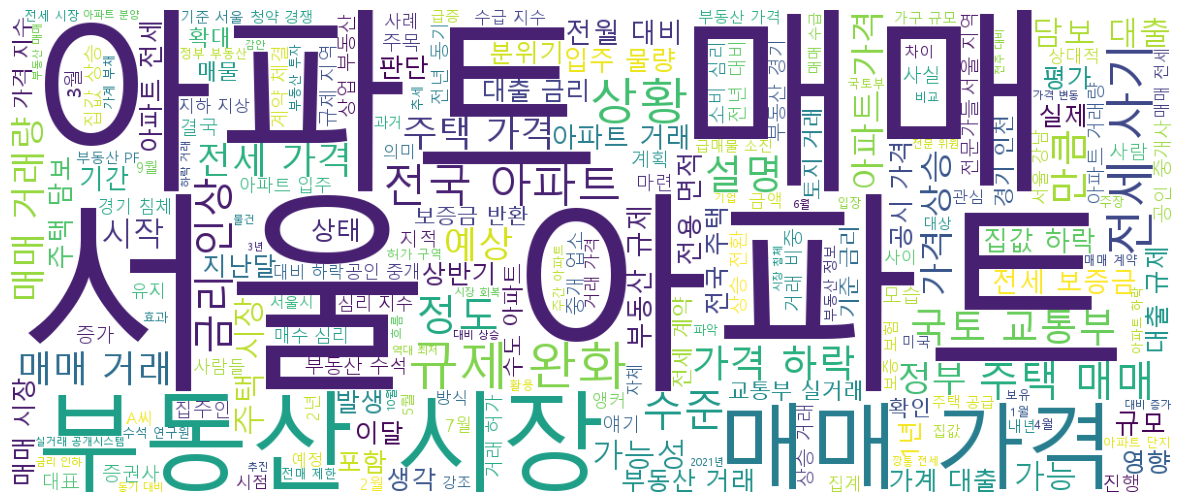

In [108]:
text = " ".join(word4_df['키워드'].values)
wordcloud(text, width=1200, height=500)

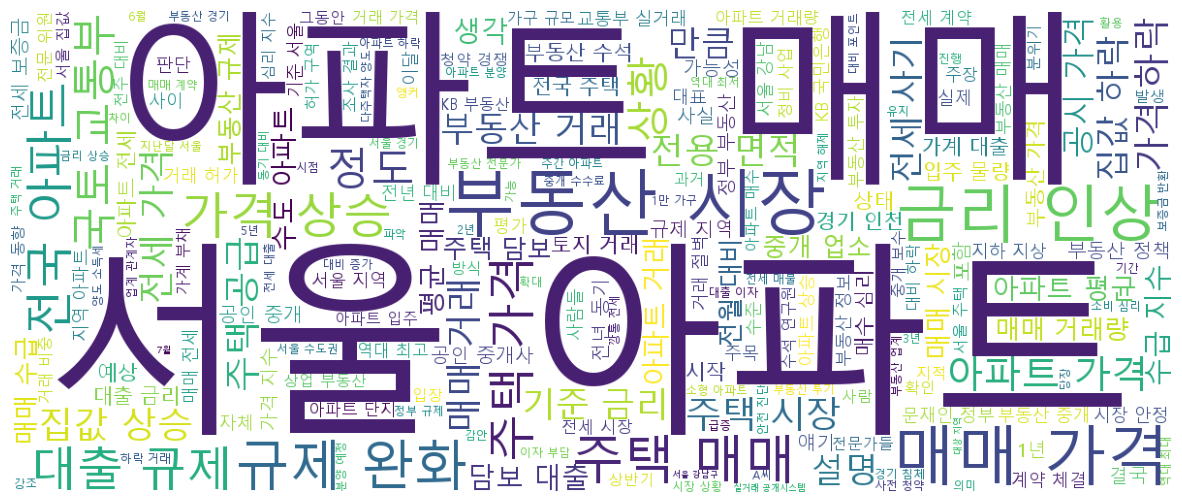

In [109]:
news_concat_df = pd.concat([word2_df, word3_df, word4_df])
text = " ".join(news_concat_df['키워드'].values)
wordcloud(text, width=1200, height=500)

In [111]:
seoul_2021_df.columns

Index(['접수연도', '자치구코드', '자치구명', '법정동코드', '법정동명', '지번구분', '지번구분명', '본번', '부번',
       '건물명', '계약일', '물건금액(만원)', '건물면적(㎡)', '토지면적(㎡)', '층', '권리구분', '취소일',
       '건축년도', '건물용도', '신고구분', '신고한 개업공인중개사 시군구명'],
      dtype='object')

In [113]:
json_path = root + '부동산_Data/seoul_municipalities_geo_simple.json'

geo_dict = json.load(open(json_path, encoding = 'utf-8'))
print(type(geo_dict))

<class 'dict'>


In [139]:
# pip install shapely
from shapely.geometry import Polygon

center_coords = {}
for feature in geo_dict['features'] :
  coords_list = feature['geometry']['coordinates'][0]
  # 다각형 생성 및 중심점 계산
  polygon = Polygon(coords_list)
  centroid = polygon.centroid
  
  print(f"{feature['properties']['name']} 중심 좌표:", centroid.y, centroid.x)
  center_coords[feature['properties']['name']] = [centroid.y, centroid.x]


강동구 중심 좌표: 37.5483944065707 127.1490497881488
송파구 중심 좌표: 37.50227830025799 127.11741633868671
강남구 중심 좌표: 37.494462511270015 127.06479838513633
서초구 중심 좌표: 37.470951088830134 127.03321769069917
관악구 중심 좌표: 37.46441861676372 126.9480660511589
동작구 중심 좌표: 37.496849949810404 126.95435097546319
영등포구 중심 좌표: 37.517394751935726 126.91205680058108
금천구 중심 좌표: 37.45769234209077 126.90337656147716
구로구 중심 좌표: 37.491752979003266 126.85892281786698
강서구 중심 좌표: 37.55827375675213 126.82656565271078
양천구 중심 좌표: 37.521995832638 126.85834449784362
마포구 중심 좌표: 37.55545304164312 126.91191462218063
서대문구 중심 좌표: 37.57464634391935 126.94111961898443
은평구 중심 좌표: 37.6170277389365 126.93098089285306
노원구 중심 좌표: 37.649326099001335 127.07742923477556
도봉구 중심 좌표: 37.66635201974568 127.03449325671559
강북구 중심 좌표: 37.64073265107264 127.01317612352358
성북구 중심 좌표: 37.60302973943303 127.02007206359023
중랑구 중심 좌표: 37.59516213323777 127.0951103083937
동대문구 중심 좌표: 37.57919963000229 127.05741603234682
광진구 중심 좌표: 37.543807322414246 127.0887

In [140]:
latitude  = bus_stop_2021_df['Y좌표'].mean()
longitude = bus_stop_2021_df['X좌표'].mean() 
latitude  = round(latitude, 4)
longitude = round(longitude, 4)
print(latitude, longitude)

37.551 126.9856


In [189]:
map = folium.Map([latitude, longitude])

In [190]:
folium.Choropleth(
    geo_data=geo_dict,
    name='budongsan',
    data=seoul_2021_avg_df,  # '구'와 '매장수' 열이 포함된 데이터프레임
    columns=['구', '평균시세'],  # 사용할 열 지정
    key_on='feature.properties.name',  # geo_dict의 'name'과 매칭
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='행정구별 평균시세'
).add_to(map)

In [191]:
# 지도 위에 행정구 이름 추가
for gu, coords in center_coords.items():
    folium.Marker(
        location=coords,
        icon=folium.DivIcon(html=f'<div style="font-weight: bold; font-size: 10px; color: black; white-space: nowrap;">{gu}</div>')
    ).add_to(map)


In [192]:
map